# 4. Computing the reaction forces at the base - Wind effects on structure

### Description : The response of wind for structure can be computed by the code specified formulas. THe reaction forces at the base - base shear and overturning moment developed on the structure under specified wind load will be calculated in this tutorial. Some exercises are proposed. 
#### The students are advised to complete the exercises. 

Project : Lecture - Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - A. Michalski, R. Wuchner, M. Pentek
        
Author : kodakkal.anoop@tum.de mate.pentek@tum.de

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np

#### Get the data files from 'Eastsale.txt'

In [2]:
winddata = np.loadtxt('EastSale.txt', skiprows=1)
year = winddata[:,0]
maxgust = winddata[:,1]

Lets evaluate the mean and variance of the wind data. 

In [3]:
meangust = np.mean(maxgust)
stdgust = np.std(maxgust)

###### Let's look at the plot

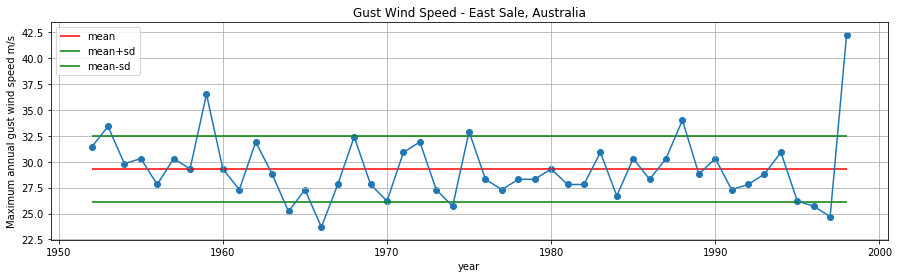

In [4]:
plt.figure(figsize=(15, 4))
plt.plot(year,maxgust)
plt.scatter(year,maxgust)
plt.hlines(meangust, min(year), max(year), color='r', label = 'mean')
plt.hlines(meangust+stdgust, min(year), max(year), color='g', label = 'mean+sd')
plt.hlines(meangust-stdgust, min(year), max(year),color='g', label = 'mean-sd')
plt.ylabel('Maximum annual gust wind speed m/s')
plt.xlabel('year')
plt.title('Gust Wind Speed - East Sale, Australia')
plt.legend()
plt.grid(True)


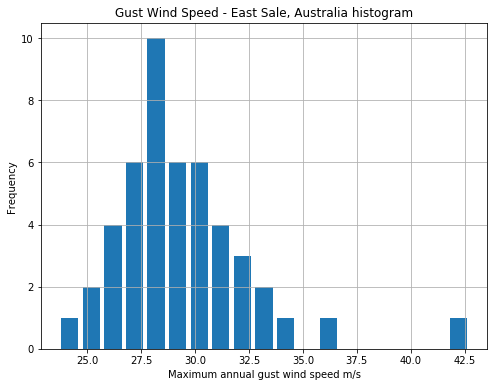

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(maxgust, bins= np.arange(min(maxgust),max(maxgust)+1), rwidth=0.8)
plt.ylabel('Frequency')
plt.xlabel('Maximum annual gust wind speed m/s')
plt.title('Gust Wind Speed - East Sale, Australia histogram')
plt.grid(True)

### Extreme wind estimation based upon measured data

#### 3 methods are used in this tutorial for extreme wind estimation 
1. Gumbel’s method
2. Gringorten’s method
3. The method of moments

#### 1. Gumbel's method

A cumulative probability distribution function for extreme values of Type I (Gumbel) is considered 
$$F_u(U)=e^{-e^{-\frac{U-u}{a}}}$$

The following steps are followed to obtain the extreme wind statistics in Gumbel's method.

**step 1**  The largest wind speed in each calendar year of the record is extracted ($U$) - 'maxgust' .

**step 2**  The series is ordered/ranked $ 1,2,...m,...N $.

**step 3**  Each value is assigned a probability of non-exceedence $p ≈ m/(N + 1)$.

**step 4**  A reduced variate is formed $ y = −ln −ln(p)$ .

**step 5**  A straight line is fit for the data reduced variate ($ y $) and  gust wind speed ($ U $).

**step 6**  The slop ($a$) and mode ($u$) of the best fit line is obtained. 

**step 7**  For a chosen return period an estimate for the maximum gust wind speed can be obtained as 
                $$ U_R = u + a \big\{ -ln\big[-ln\big(1-\frac{1}{R}\big)\big]\big\}$$

###### What does return period indicate ? 

**step 1**  The largest wind speed in each calendar year of the record is extracted ($U$) - 'maxgust' .

**step 2**  The series is ordered/ranked $ 1,2,...m,...N $.

In [6]:
sortedgust = np.sort(maxgust)
max_rank = len(sortedgust)
rank = np.arange(1,max_rank+1)

**step 3**  Each value is assigned a probability of non-exceedence $p ≈ m/(N + 1)$.

**step 4**  A reduced variate is formed $ y = −ln −ln(p)$ .

In [7]:
prob_nonexc_gumbel = rank /(max_rank+1)
red_var_gumbel = -np.log(-np.log(prob_nonexc_gumbel))

**step 5**  A straight line is fit for the data reduced variate ($ y $) and  gust wind speed ($ U $).

Check out the [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)  function

**step 6**  The slope ($a$) and mode ($u$) of the best fit line is obtained. 

In [8]:
[slope_gumbel , mode_gumbel] = np.polyfit(red_var_gumbel,sortedgust,1)

###### Let's look at the plot     

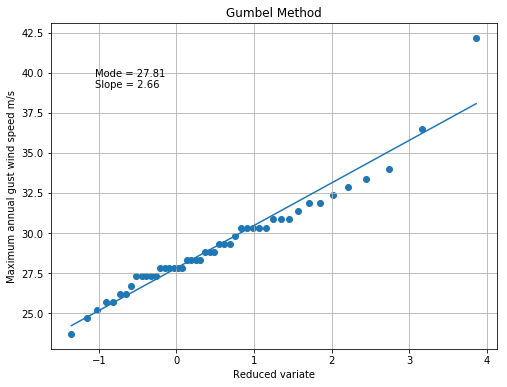

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(red_var_gumbel,sortedgust)
x = np.linspace(min(red_var_gumbel), max(red_var_gumbel),50)
plt.plot(x, mode_gumbel+ slope_gumbel * x)
plt.text(0.1, 0.8,'Mode = ' + str(round(mode_gumbel,2)) +
         '\nSlope = ' + str(round(slope_gumbel,2)),
         transform=plt.gca().transAxes)
plt.ylabel('Maximum annual gust wind speed m/s')
plt.xlabel('Reduced variate')
plt.title('Gumbel Method')
plt.grid(True)

**step 7**  For a chosen return period an estimate for the maximum gust wind speed can be obtained as 
                $$ U_R = u + a \big\{ -ln\big[-ln\big(1-\frac{1}{R}\big)\big]\big\}$$
                

In [10]:
returnperiod = np.arange(10,1000,10)
gustwind_predicted_gumbel = mode_gumbel + slope_gumbel * ( -np.log(-np.log(1-1/returnperiod)))

###### Let's look at the plot     

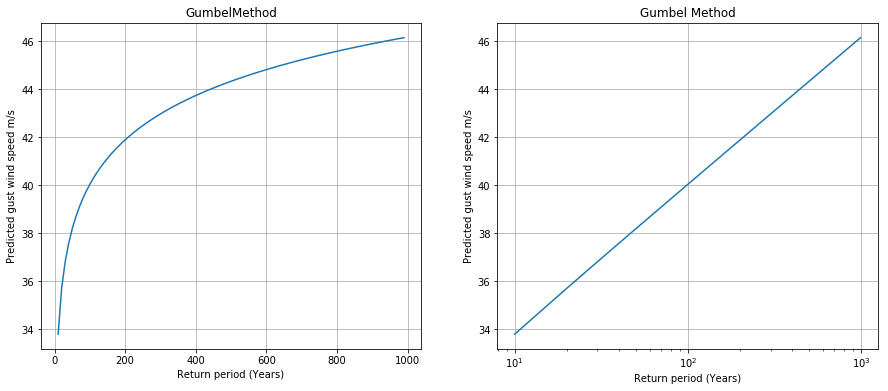

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(returnperiod,gustwind_predicted_gumbel)
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('GumbelMethod')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(returnperiod,gustwind_predicted_gumbel)
plt.xscale('log')
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('Gumbel Method')
plt.grid(True)

#### 2. Gringorten’s method

the steps are similar to that of Gumbel's except

**step 3**  Each value is assigned a probability of non-exceedence $p ≈ \frac{(m-0.44)}{(N + 0.12)}$.

In [12]:
prob_nonexc_gringorten = (rank-0.44) /(max_rank+0.12)
red_var_gringorten = -np.log(-np.log(prob_nonexc_gringorten))
[slope_gringorten , mode_gringorten] = np.polyfit(red_var_gringorten,sortedgust,1)
gustwind_predicted_gringorten = mode_gringorten + slope_gringorten * ( -np.log(-np.log(1-1/returnperiod)))

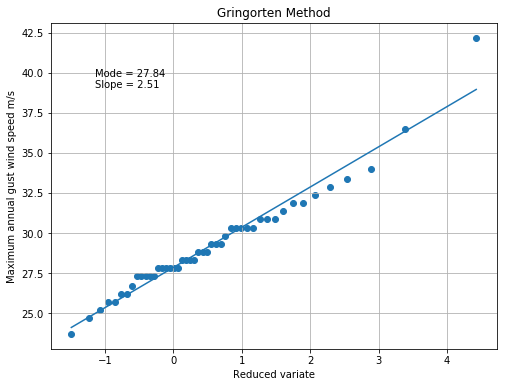

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(red_var_gringorten,sortedgust)
x = np.linspace(min(red_var_gringorten), max(red_var_gringorten),50)
plt.plot(x, mode_gringorten+ slope_gringorten * x)
plt.text(0.1, 0.8,'Mode = ' + str(round(mode_gringorten,2)) +
         '\nSlope = ' + str(round(slope_gringorten,2)),
         transform=plt.gca().transAxes)
plt.ylabel('Maximum annual gust wind speed m/s')
plt.xlabel('Reduced variate')
plt.title('Gringorten Method')
plt.grid(True)

#### 2. The method of moments

The slope and mode is approximated in method of moments as 

Slope $ a \approx \big( \frac{\sqrt{6}}{\pi}\big) \sigma$

Mode $ u \approx \mu - 0.5772 a$

In [14]:
slope_moments = np.sqrt(6)/np.pi * stdgust
mode_moments  = meangust - 0.5772 * slope_moments
gustwind_predicted_moments = mode_moments + slope_moments * ( -np.log(-np.log(1-1/returnperiod)))

###### Let's look at the plot     

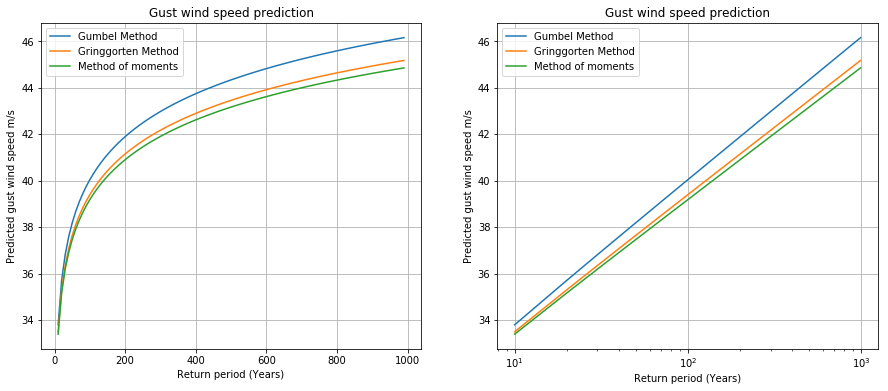

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(returnperiod,gustwind_predicted_gumbel, label ='Gumbel Method')
plt.plot(returnperiod,gustwind_predicted_gringorten, label ='Gringgorten Method')
plt.plot(returnperiod,gustwind_predicted_moments, label ='Method of moments')
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('Gust wind speed prediction')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(returnperiod,gustwind_predicted_gumbel, label ='Gumbel Method')
plt.plot(returnperiod,gustwind_predicted_gringorten, label ='Gringgorten Method')
plt.plot(returnperiod,gustwind_predicted_moments, label ='Method of moments')
plt.xscale('log')
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('Gust wind speed prediction')
plt.legend()
plt.grid(True)

### Exercise 01 : For Jiddah airport 

For the given data of Jiddah airport compute the predicted guest wind speed